### ASTR 3300/5300$-$003: Astrostatistics
***N. Pol***
___

# Homework 2
### Due: Friday, Feb 7, at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution



Solution to part 1)



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>



Solution to part 2)



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>



Solution to part 3)

Monte Carlo integration gives:  158.814     And RHS =  162


Solution to part 4)

Integral using 100 different batches for different N is: 
For 100 N:    170.535     Max:  352.518     Min:  61.55
For 1000 N:   160.483     Max:  202.146     Min:  124.871
For 10000 N:  162.343     Max:  176.149     Min:  146.149


Solution to part 5)



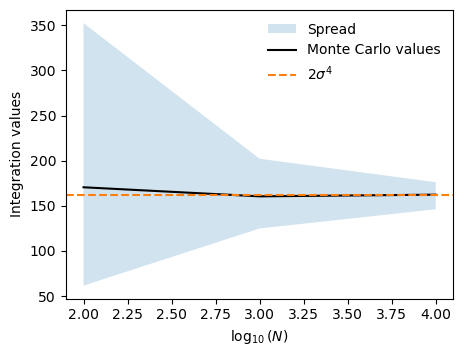

In [9]:
from IPython.display import display, Latex
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from colorama import Fore, Style


def monte_carlo(x, sigma):

    return np.mean(np.sqrt((np.pi*(sigma**2))/2) * (x**3))

def monte_carlo_batches(dist, sigma, N, batches):

    means = []
    max_int = []
    min_int = []

    for n in N:
        batch_means = []

        for b in range(batches):
            
            samples = dist.rvs(n)
            mask = samples>0
            samples_pos = samples[mask]
        
            mc_int_batches = monte_carlo(x=samples_pos, sigma=sigma)
            batch_means.append(mc_int_batches)

        means.append(np.mean(batch_means))
        max_int.append(np.max(batch_means))
        min_int.append(np.min(batch_means))


    return means, max_int, min_int


############## Part 1 ###############
print("\n")
print(Fore.RED+"Solution to part 1)")
print(Style.RESET_ALL)

display(Latex(r'The usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$ is given as: '))
display(Latex(r'$f(x) =  \frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp(-\frac{x^{2}}{2 \sigma^{2}})$'))
display(Latex(r'The corresponding form of a half-Gaussian distribution between $0$ and $+\infty$ is: '))
display(Latex(r'$f_{half}(x) =  \sqrt{\frac{2}{\pi \sigma^{2}}} \exp(-\frac{x^{2}}{2 \sigma^{2}})$'))




############## Part 2 ###############
print("\n")
print(Fore.RED+"Solution to part 2)")
print(Style.RESET_ALL)

display(Latex(r'In terms of a normalized half-Gaussian distribution: '))
display(Latex(r'$\sqrt{\frac{\pi \sigma^{2}}{2}} \int_{0}^{\infty} x^{3} f_{half}(x) = 2 \sigma^{4}$'))




############## Part 3 ###############
print("\n")
print(Fore.RED+"Solution to part 3)")
print(Style.RESET_ALL)

distG = norm(loc=0, scale=3)
N = [10**2, 10**3, 10**4, 10**5] 

distG_samples = distG.rvs(N[3])

mc_samples_mask = distG_samples>0 
mc_samples = distG_samples[mc_samples_mask]

mc_int = monte_carlo(x=mc_samples, sigma=3)
print("Monte Carlo integration gives: ", round(mc_int, 3), "    And RHS = ", round(2*(3**4), 3))




############## Part 4 ###############
print("\n")
print(Fore.RED+"Solution to part 4)")
print(Style.RESET_ALL)

mc_int_vals, max_vals, min_vals = monte_carlo_batches(dist=distG, sigma=3, N=N[:3], batches=100)
print("Integral using 100 different batches for different N is: ")
print("For 100 N:   ", round(mc_int_vals[0], 3), "    Max: ", round(max_vals[0], 3), "    Min: ", round(min_vals[0], 3))
print("For 1000 N:  ", round(mc_int_vals[1], 3), "    Max: ", round(max_vals[1], 3), "    Min: ", round(min_vals[1], 3))
print("For 10000 N: ", round(mc_int_vals[2], 3), "    Max: ", round(max_vals[2], 3), "    Min: ", round(min_vals[2], 3))




############## Part 5 ###############
print("\n")
print(Fore.RED+"Solution to part 5)")
print(Style.RESET_ALL)

fig, ax = plt.subplots(figsize=(5, 3.75))

plt.fill_between(np.log10(N[:3]), max_vals, min_vals, alpha=0.2, label='Spread')
plt.plot(np.log10(N[:3]), mc_int_vals, color='black', label='Monte Carlo values')
plt.axhline(2*(3**4), ls='--', color='tab:orange', label=r'$2 \sigma^{4}$')
plt.xlabel(r'$\log_{10}(N)$')
plt.ylabel('Integration values')
plt.legend(frameon=False)
plt.show()

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution



Solution to part 1)

10 random draws are:  [ 80.94386908  84.2136741  130.18415769  89.53995622  85.69934871
 110.84301134  61.76112714  95.55517585 109.18271204 106.55964027]
PDF evaluated at x = 145 is  0.0002954565607958672


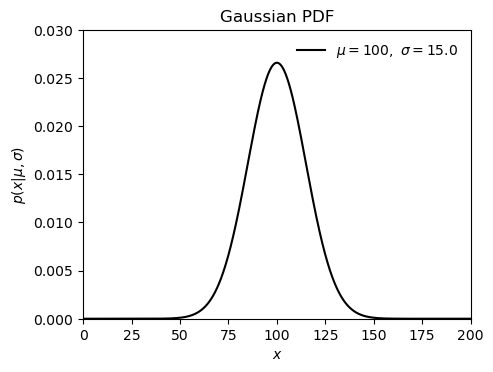



Solution to part 2)



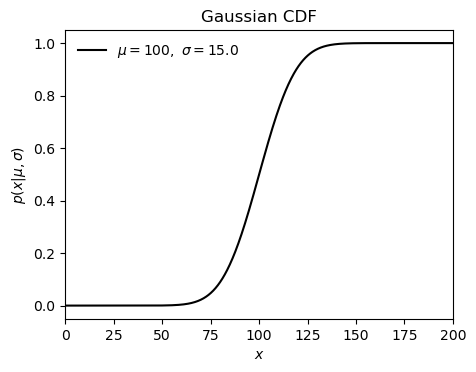

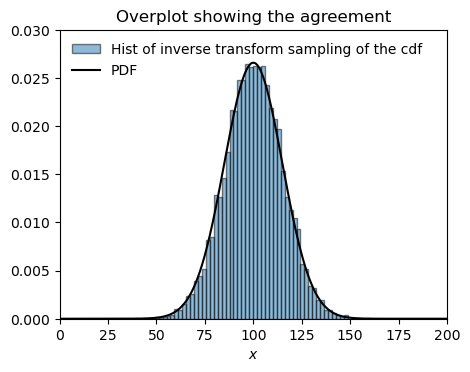



Solution to part 3)

Fraction of people having IQ > 145 is  0.0013498980316300933 or a percentage of  0.13498980316300932 %


Solution to part 4)

IQ corresponding to one in a million is  171.301


In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from colorama import Fore, Style


############## Part 1 ###############
distG = norm(loc=100, scale=15)
xgrid = np.linspace(0, 200, 1000)
gausspdf = distG.pdf(xgrid)

print("\n")
print(Fore.RED+"Solution to part 1)")
print(Style.RESET_ALL)
print("10 random draws are: ", distG.rvs(10))
print("PDF evaluated at x = 145 is ", distG.pdf(x=145))

fig, ax = plt.subplots(figsize=(5, 3.75))

plt.plot(xgrid, gausspdf, c='black', label=r'$\mu=%i,\ \sigma=%.1f$' % (100, 15))
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title("Gaussian PDF")
plt.legend(frameon=False)
plt.show()




############## Part 2 ###############
print("\n")
print(Fore.RED+"Solution to part 2)")
print(Style.RESET_ALL)

gausscdf = distG.cdf(xgrid)
fig, ax = plt.subplots(figsize=(5, 3.75))

plt.plot(xgrid, gausscdf, c='black', label=r'$\mu=%i,\ \sigma=%.1f$' % (100, 15))
plt.xlim(0, 200)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title("Gaussian CDF")
plt.legend(frameon=False)
plt.show()

gaussppf = distG.ppf(np.random.rand(10000))

fig, ax = plt.subplots(figsize=(5, 3.75))

plt.hist(gaussppf, bins=60, density=True, alpha=0.5, edgecolor='black', label="Hist of inverse transform sampling of the cdf")
plt.plot(xgrid, gausspdf, c='black', label="PDF")
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('$x$')
plt.title("Overplot showing the agreement")
plt.legend(frameon=False, loc=2)
plt.show()




############## Part 3 ###############
print("\n")
print(Fore.RED+"Solution to part 3)")
print(Style.RESET_ALL)

iq_gr_145 = distG.sf(145)  #equivalent to 1 - distG.cdf(145)
print("Fraction of people having IQ > 145 is ", iq_gr_145, "or a percentage of ", iq_gr_145*100, "%")




############## Part 4 ###############
print("\n")
print(Fore.RED+"Solution to part 4)")
print(Style.RESET_ALL)

iq_one_in_million = distG.ppf(1 - (1/(10**6)))
print("IQ corresponding to one in a million is ", round(iq_one_in_million, 3))

## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

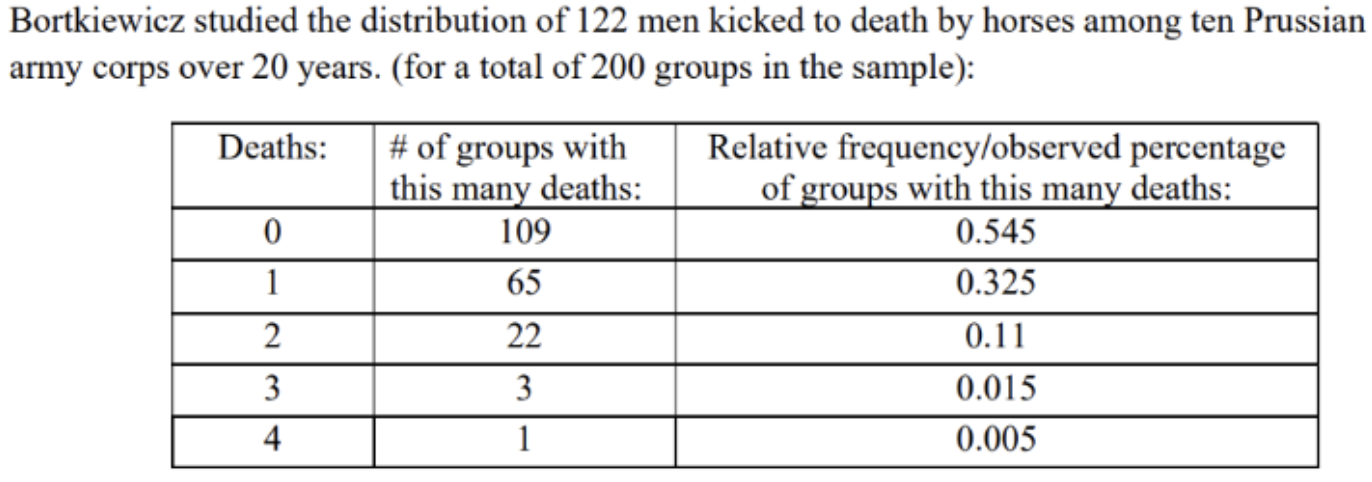

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution



Solution to part 1)



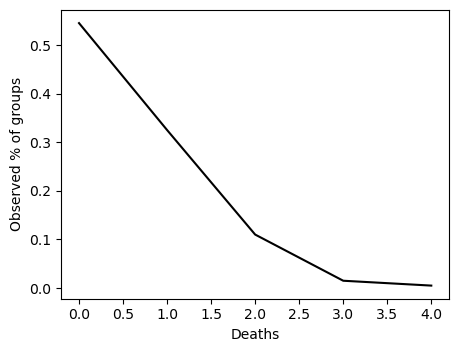



Solution to part 2)



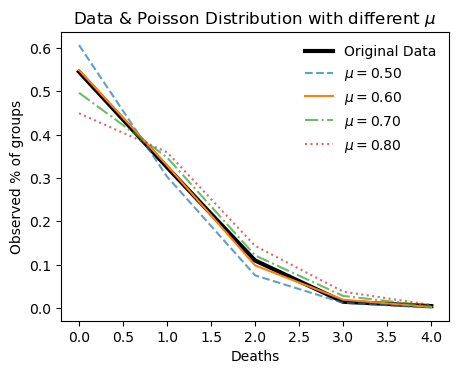



Solution to part 3)



<IPython.core.display.Latex object>

This gives  μ  =  0.61
With this given μ poisson statistics is completely defined:
Standard Deviation  σ  =  0.781
Mode =  μ - 1 =  -0.39
Skewness =  1.2804
Kurtosis =  1.6393


Solution to part 4)



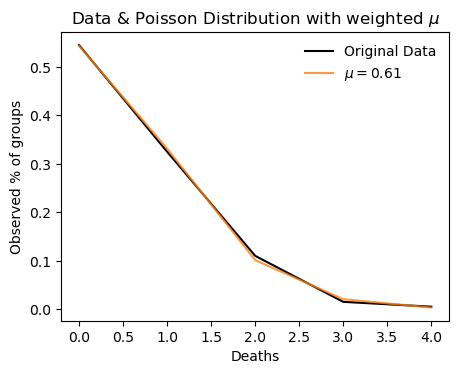

In [6]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt
from colorama import Fore, Style
from IPython.display import display, Latex

############## Part 1 ###############
deaths = np.arange(0, 5, 1)
rel_freq = np.array([0.545, 0.325, 0.11, 0.015, 0.005])

print("\n")
print(Fore.RED+"Solution to part 1)")
print(Style.RESET_ALL)

fig, ax = plt.subplots(figsize=(5, 3.75))

plt.plot(deaths, rel_freq, c='black')
plt.xlabel('Deaths')
plt.ylabel('Observed % of groups')
plt.show()




############## Part 2 ###############
print("\n")
print(Fore.RED+"Solution to part 2)")
print(Style.RESET_ALL)

distP = []
mu_trials = [0.5, 0.6, 0.7, 0.8]
ls = ['--', '-', '-.', ':']
alpha = [0.7, 1, 0.7, 0.7]
for p in mu_trials:
    distP.append(poisson(p))

fig, ax = plt.subplots(figsize=(5, 3.75))

plt.plot(deaths, rel_freq, lw=3, c='black', label='Original Data')
for p in range(len(mu_trials)):
    plt.plot(deaths, distP[p].pmf(deaths), ls=ls[p], alpha=alpha[p], label=r'$\mu = %.2f$' %mu_trials[p])
plt.xlabel('Deaths')
plt.ylabel('Observed % of groups')
plt.title(r'Data & Poisson Distribution with different $\mu$')
plt.legend(frameon=False)
plt.show()




############## Part 3 ###############
print("\n")
print(Fore.RED+"Solution to part 3)")
print(Style.RESET_ALL)

weighted_mean = np.sum(deaths*rel_freq)/np.sum(rel_freq)
std = np.sqrt(weighted_mean)
mode = weighted_mean - 1
skewness = 1/std
kurtosis = 1/weighted_mean

display(Latex(r'By definition of weighted mean: $W =  \mu = \frac{\sum_{i=1}^{N} w_{i} x_{i}}{\sum_{i=1}^{N} w_{i}}$'))
print('This gives ', "\u03bc", ' = ', round(weighted_mean,4))
print('With this given', "\u03bc", "poisson statistics is completely defined:")
print("Standard Deviation ", "\u03C3", " = ", round(std,4))
print("Mode = ", "\u03bc", "- 1 = ", round(mode,4))
print("Skewness = ", round(skewness,4))
print("Kurtosis = ", round(kurtosis,4))




############## Part 4 ###############
print("\n")
print(Fore.RED+"Solution to part 4)")
print(Style.RESET_ALL)

fig, ax = plt.subplots(figsize=(5, 3.75))

plt.plot(deaths, rel_freq, c='black', label='Original Data')
plt.plot(deaths, poisson.pmf(deaths, weighted_mean), ls='-', color='tab:orange', alpha=0.8, label=r'$\mu = %.2f$' %weighted_mean)
plt.xlabel('Deaths')
plt.ylabel('Observed % of groups')
plt.title(r'Data & Poisson Distribution with weighted $\mu$')
plt.legend(frameon=False)
plt.show()